In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from time import time

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 10)

# Problem 1: Find the sum of multiples of 3 or 5 below 1000

In [2]:
def problem1(b):
    """Computes the sum of integers that are multiples of 3 or 5 and below b."""
    s = 0
    for i in range(1, b):
        if i % 3 == 0 or i % 5 == 0:
            s += i
    return s

In [3]:
print('Sum below 100 = {}'.format(problem1(10)))
print('Sum below 1000 = {}'.format(problem1(1000)))

Sum below 100 = 23
Sum below 1000 = 233168


# Problem 2: Sum of the even valued terms in the Fibonacci sequence that do not exceed 4,000,000

In [4]:
def fib(n):
    """Computes the nth Fibonacci number."""
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)

In [5]:
def problem2(b):
    s = 0
    i = 0
    f_n = fib(i)
    while f_n < b:
        if f_n % 2 == 0:
            s += f_n
        i += 1
        f_n = fib(i)
    return s

In [6]:
bounds = [10, 100, 500, 1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000]
run_times = []

In [7]:
for bnd in bounds:
    start_time = time()
    _ = problem2(bnd)
    run_times.append(time() - start_time)

In [8]:
times_df = pd.DataFrame({'bnd': bounds, 'tms': run_times})

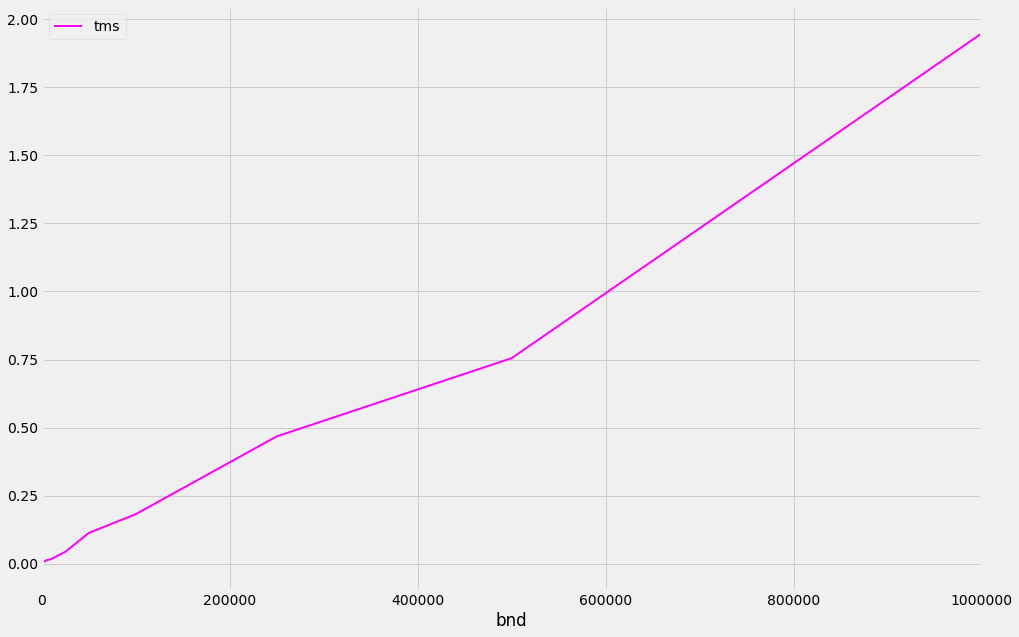

In [9]:
times_df.plot(x='bnd', y='tms', lw=2, color='magenta');

In [10]:
print('Sum of even Fibonacci numbers below 4 million is {}'.format(problem2(4000000)))

Sum of even Fibonacci numbers below 4 million is 4613732


# Problem 3: Find the largest prime factor of 600851475143

In [76]:
def seive(n):
    potentials = {i: True for i in range(2, int(n) + 1)}
    bound = int(np.sqrt(n))
    for i in range(2, bound + 1):
        if potentials[i]:
            for j in range(i ** 2, int(n) + 1, i):
                potentials[j] = False
    primes = [f for f in potentials.keys() if potentials[f]]
    return primes

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

In [47]:
seive(30)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [48]:
big_num = 600851475143

In [49]:
for i in range(3, int(np.sqrt(big_num)), 2):
    if big_num % i == 0:
        print('{}: {}'.format(i, big_num / i))

71: 8462696833.0
839: 716151937.0
1471: 408464633.0
6857: 87625999.0
59569: 10086647.0
104441: 5753023.0
486847: 1234169.0


In [50]:
%timeit seive(486847)

1 loop, best of 3: 210 ms per loop


In [51]:
%timeit seive(1234169)

1 loop, best of 3: 568 ms per loop


In [52]:
int(np.sqrt(big_num)) - 1

775145

In [53]:
start = time()
factor_found = False
potential_factor = int(np.sqrt(big_num)) - 1
factors = None
while not factor_found:
    if big_num % potential_factor == 0:
        factors = (potential_factor, big_num / potential_factor)
        factor_found = True
    else:
        potential_factor = potential_factor - 2
print('This took {} secs to find factors'.format(time() - start))

This took 0.04731488227844238 secs to find factors


In [54]:
factors

(486847, 1234169.0)

In [65]:
def factorizer(n):
    factor_found = False
    potential_factor = int(np.sqrt(n)) - 1
    factors = []
    while not factor_found:
        if n % potential_factor == 0:
            factors += [potential_factor, n / potential_factor]
            factor_found = True
        else:
            potential_factor = potential_factor - 2
    return factors

def factorizer2(n):
    factor_found = False
    potential_factor = 3
    factor = 1.0
    while not factor_found:
        if potential_factor > n:
            factor_found = True
        elif n % potential_factor == 0:
            factor_found = True
            factor = n / potential_factor
        else:
            potential_factor += 2
    return factor

In [67]:
factorizer2(big_num)

8462696833.0

In [71]:
factorizer2(factorizer2(factorizer2(big_num)))

6857.0

In [74]:
test = 13195
flag = 13195
while flag > 1:
    print('{}, {}'.format(factorizer2(test), test / factorizer2(test)))
    flag = factorizer2(test)
    test = factorizer2(test)

2639.0, 5.0
377.0, 7.0
29.0, 13.0
1.0, 29.0


In [75]:
test = 600851475143
flag = 600851475143
while flag > 1:
    print('{}, {}'.format(factorizer2(test), test / factorizer2(test)))
    flag = factorizer2(test)
    test = factorizer2(test)

8462696833.0, 71.0
10086647.0, 839.0
6857.0, 1471.0
1.0, 6857.0
